# Labo 1 BUI


étudiants: Julien Billeter, Julien Muhlemann
date: 20:09:2024


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_ibm.csv')
df.sample(10)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


attrition_rate_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100

avg_income_by_role_dept = df.groupby(['Department', 'JobRole'])['MonthlyIncome'].mean().unstack()

avg_job_satisfaction_by_dept = df.groupby('Department')['JobSatisfaction'].mean() * 100  # Assume job satisfaction is already on a scale of 1-5

avg_tenure_by_dept = df.groupby('Department')['YearsAtCompany'].mean()

avg_work_life_balance_by_dept = df.groupby('Department')['WorkLifeBalance'].mean() * 100  # Assuming it's also on a scale of 1-5

overtime_rate_by_dept = df.groupby('Department')['OverTime'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100

avg_training_times_by_dept = df.groupby('Department')['TrainingTimesLastYear'].mean()

performance_distribution_by_dept = df.groupby('Department')['PerformanceRating'].value_counts(normalize=True).unstack().fillna(0) * 100

avg_num_companies_worked_by_dept = df.groupby('Department')['NumCompaniesWorked'].mean()

avg_stock_options_by_level_dept = df.groupby(['Department', 'JobLevel'])['StockOptionLevel'].mean().unstack()

gender_count_by_level = df.groupby(['JobLevel', 'Gender']).size().unstack(fill_value=0)

gender_count_by_level['Male to Female Ratio'] = (gender_count_by_level['Male'] / gender_count_by_level['Female'].replace(0, pd.NA)).fillna(0) * 100

gender_count_by_level = gender_count_by_level[['Male', 'Female', 'Male to Female Ratio']]

gender_ratio_by_level = gender_count_by_level.reset_index()

# Output the KPIs
kpi_summary_by_dept = {
    "Attrition Rate (%)": attrition_rate_by_dept,
    "Avg Monthly Income by Role": avg_income_by_role_dept,
    "Job Satisfaction by Dept (%)": avg_job_satisfaction_by_dept,
    "Avg Tenure (Years at Company)": avg_tenure_by_dept,
    "Avg Work-Life Balance (%)": avg_work_life_balance_by_dept,
    "Overtime Participation Rate (%)": overtime_rate_by_dept,
    "Avg Training Times Last Year": avg_training_times_by_dept,
    "Performance Rating Distribution (%)": performance_distribution_by_dept,
    "Avg Num of Companies Worked": avg_num_companies_worked_by_dept,
    "Stock Options by Job Level": avg_stock_options_by_level_dept
}


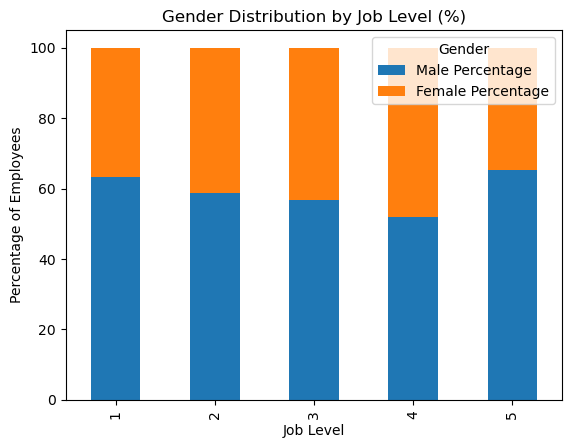

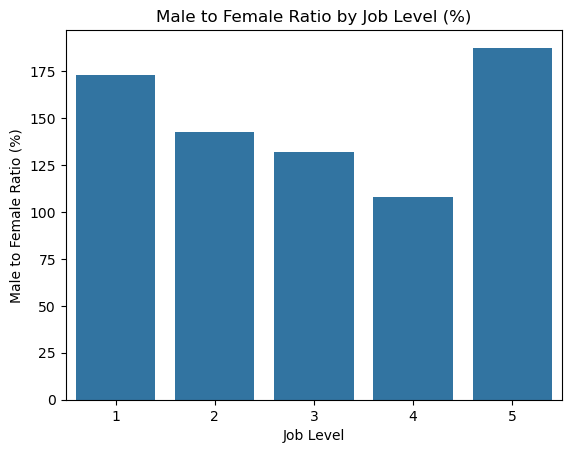

In [40]:

gender_ratio_by_level['Total'] = gender_ratio_by_level['Male'] + gender_ratio_by_level['Female']
gender_ratio_by_level['Male Percentage'] = (gender_ratio_by_level['Male'] / gender_ratio_by_level['Total']) * 100
gender_ratio_by_level['Female Percentage'] = (gender_ratio_by_level['Female'] / gender_ratio_by_level['Total']) * 100

gender_ratio_by_level.plot(x='JobLevel', y=['Male Percentage', 'Female Percentage'], kind='bar', stacked=True, title='Gender Distribution by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Percentage of Employees')
plt.legend(title='Gender')
plt.show()

sns.barplot(x='JobLevel', y='Male to Female Ratio', data=gender_ratio_by_level)
plt.title('Male to Female Ratio by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Male to Female Ratio (%)')
plt.show()


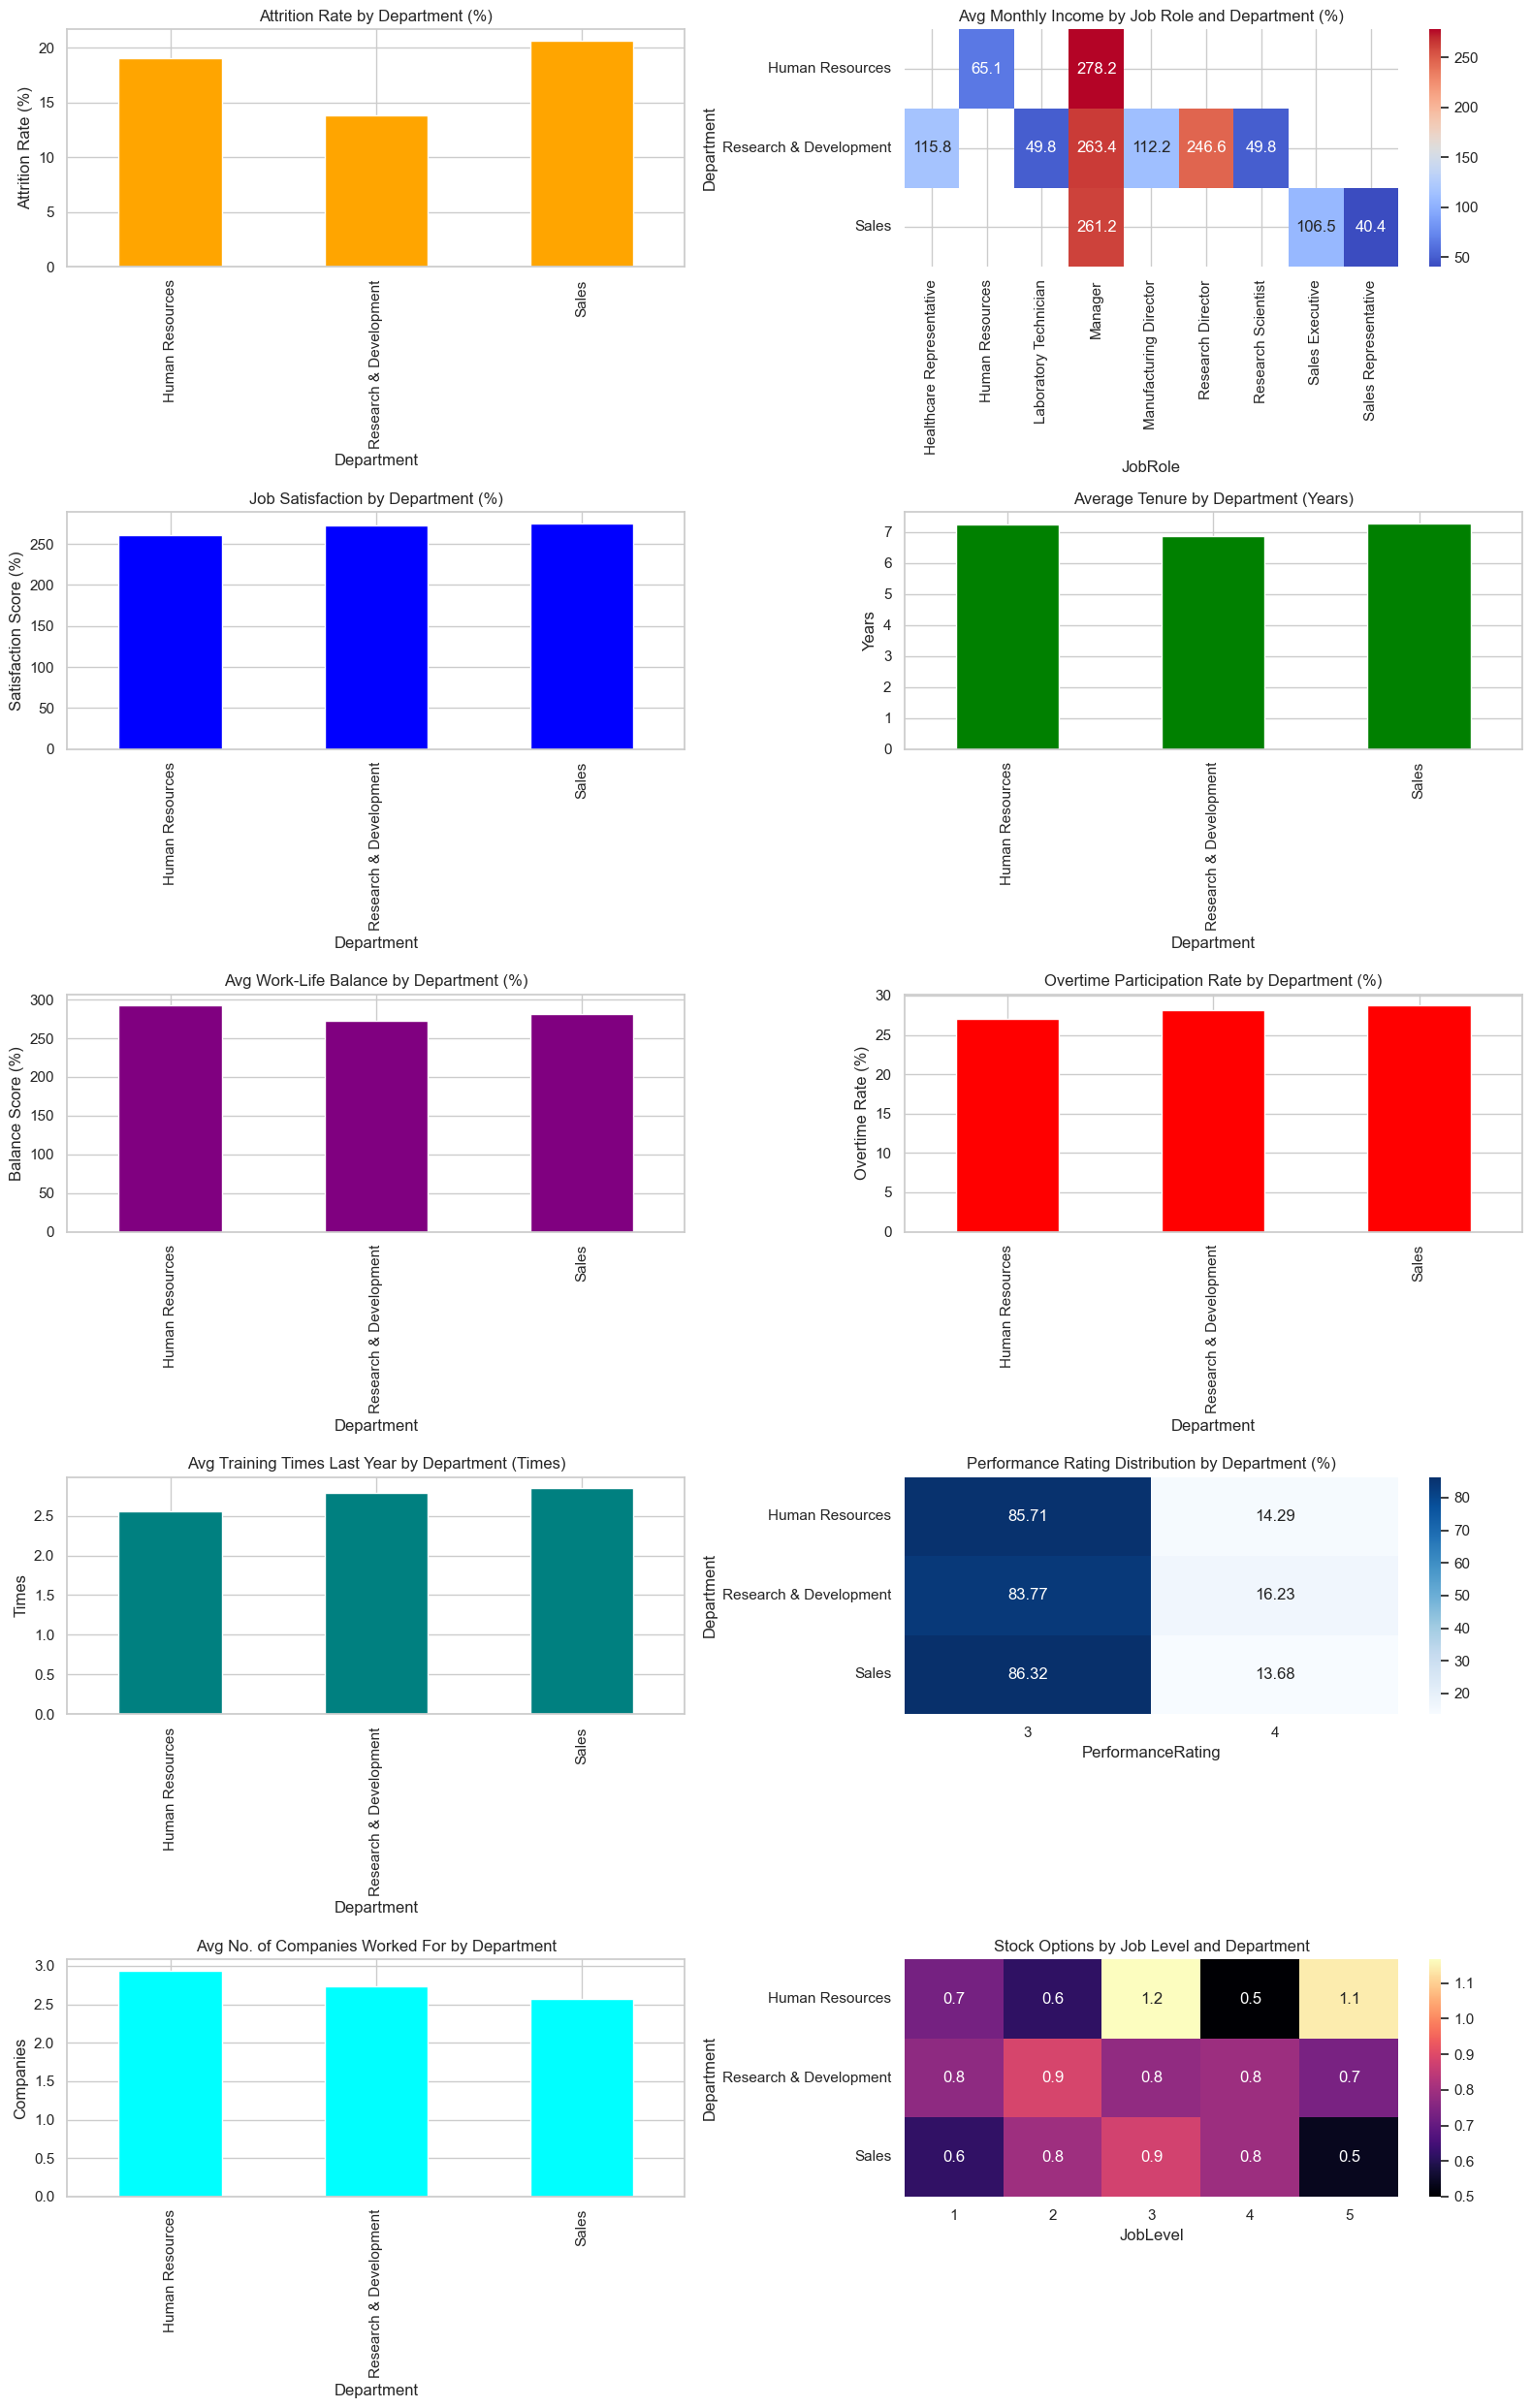

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

overall_avg_income = df['MonthlyIncome'].mean()

avg_income_by_role_dept_percentage = (avg_income_by_role_dept / overall_avg_income) * 100

fig, axes = plt.subplots(5, 2, figsize=(16, 25))

attrition_rate_by_dept.plot(kind='bar', ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Attrition Rate by Department (%)")
axes[0, 0].set_ylabel('Attrition Rate (%)')
axes[0, 0].set_xlabel('Department')

sns.heatmap(avg_income_by_role_dept_percentage, ax=axes[0, 1], annot=True, cmap='coolwarm', fmt=".1f")
axes[0, 1].set_title("Avg Monthly Income by Job Role and Department (%)")

avg_job_satisfaction_by_dept.plot(kind='bar', ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Job Satisfaction by Department (%)")
axes[1, 0].set_ylabel('Satisfaction Score (%)')

avg_tenure_by_dept.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title("Average Tenure by Department (Years)")
axes[1, 1].set_ylabel('Years')

avg_work_life_balance_by_dept.plot(kind='bar', ax=axes[2, 0], color='purple')
axes[2, 0].set_title("Avg Work-Life Balance by Department (%)")
axes[2, 0].set_ylabel('Balance Score (%)')

overtime_rate_by_dept.plot(kind='bar', ax=axes[2, 1], color='red')
axes[2, 1].set_title("Overtime Participation Rate by Department (%)")
axes[2, 1].set_ylabel('Overtime Rate (%)')

avg_training_times_by_dept.plot(kind='bar', ax=axes[3, 0], color='teal')
axes[3, 0].set_title("Avg Training Times Last Year by Department (Times)")
axes[3, 0].set_ylabel('Times')

sns.heatmap(performance_distribution_by_dept, ax=axes[3, 1], annot=True, cmap='Blues', fmt=".2f")
axes[3, 1].set_title("Performance Rating Distribution by Department (%)")

avg_num_companies_worked_by_dept.plot(kind='bar', ax=axes[4, 0], color='cyan')
axes[4, 0].set_title("Avg No. of Companies Worked For by Department")
axes[4, 0].set_ylabel('Companies')

sns.heatmap(avg_stock_options_by_level_dept, ax=axes[4, 1], annot=True, cmap='magma', fmt=".1f")
axes[4, 1].set_title("Stock Options by Job Level and Department")

plt.tight_layout()
plt.show()


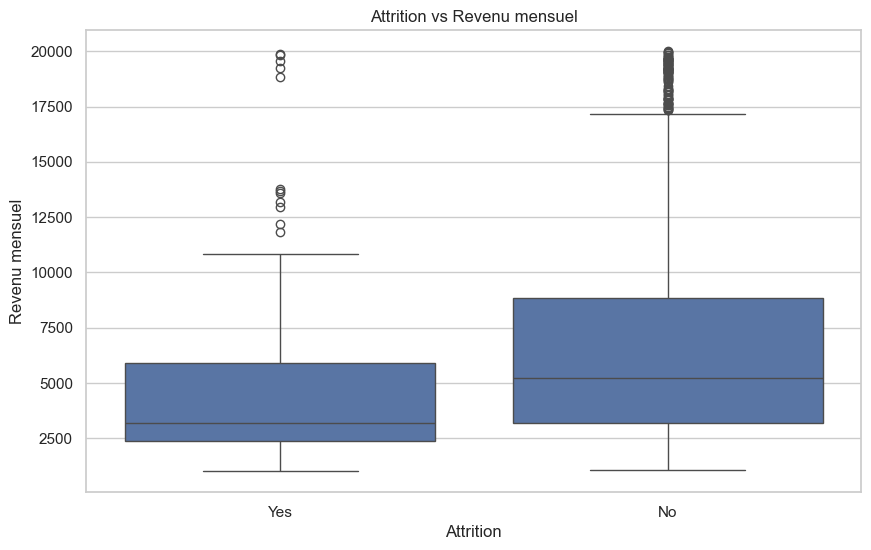

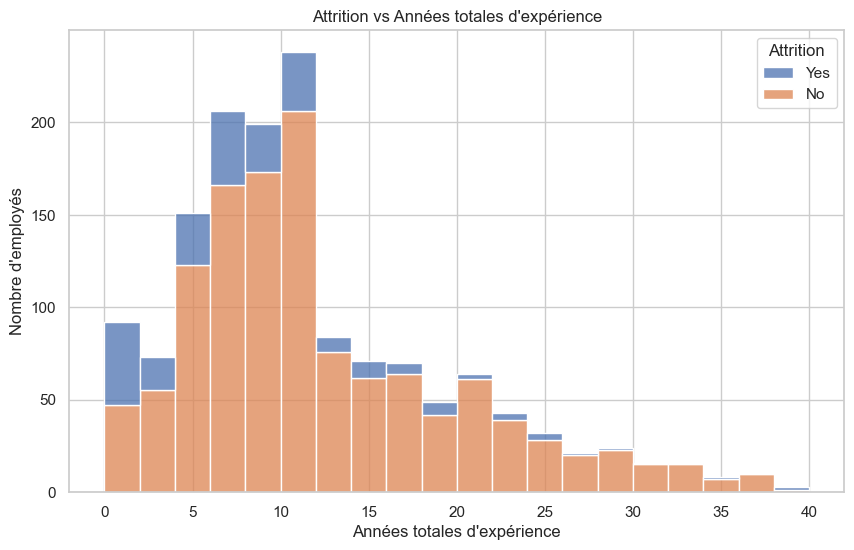

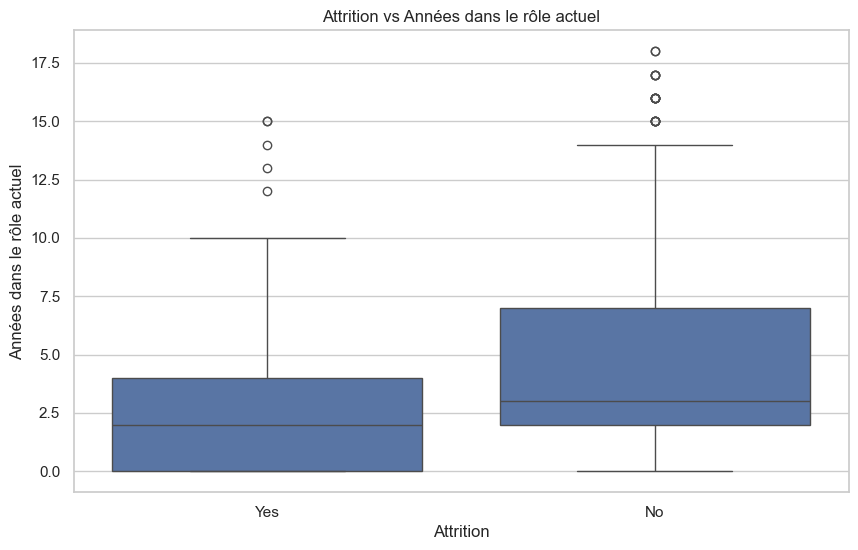

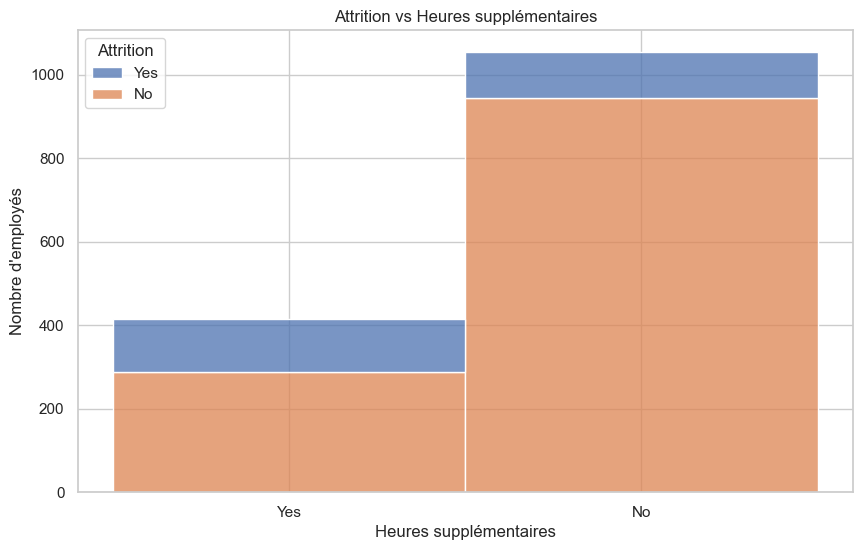

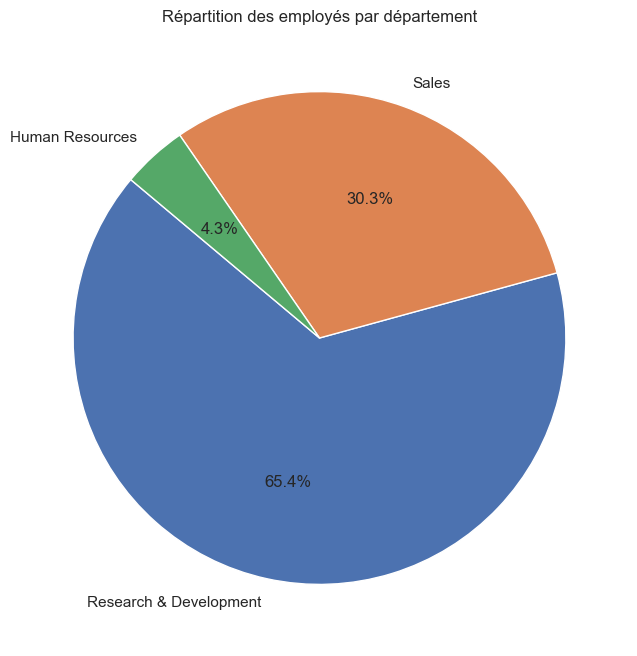

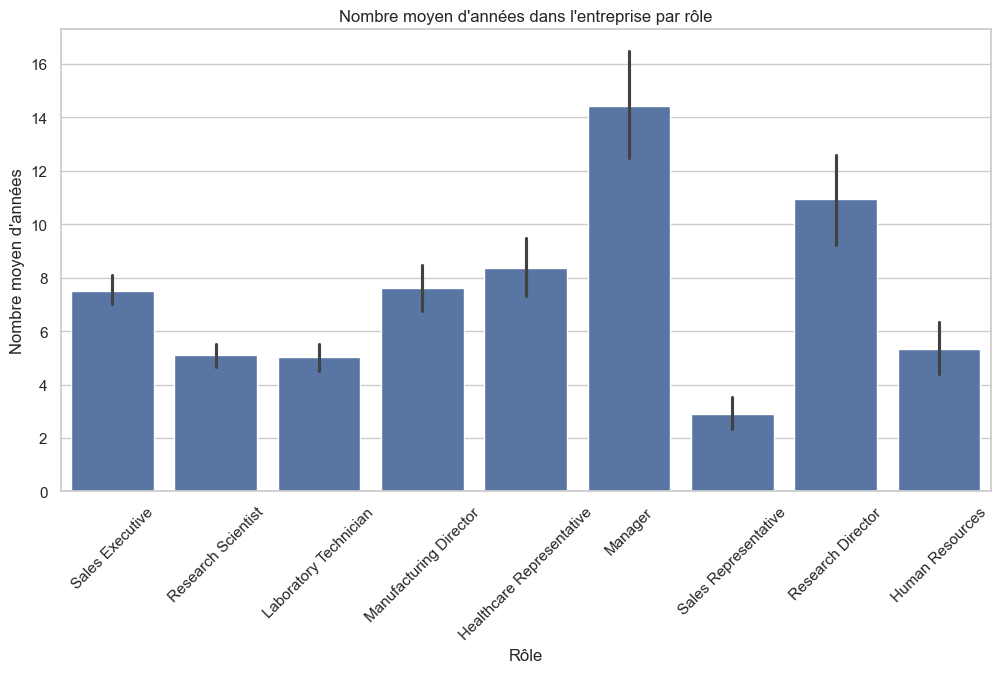

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Attrition vs Revenu mensuel")
plt.xlabel("Attrition")
plt.ylabel("Revenu mensuel")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=20)
plt.title("Attrition vs Années totales d'expérience")
plt.xlabel("Années totales d'expérience")
plt.ylabel("Nombre d'employés")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='YearsInCurrentRole')
plt.title("Attrition vs Années dans le rôle actuel")
plt.xlabel("Attrition")
plt.ylabel("Années dans le rôle actuel")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OverTime', hue='Attrition', multiple='stack')
plt.title("Attrition vs Heures supplémentaires")
plt.xlabel("Heures supplémentaires")
plt.ylabel("Nombre d'employés")
plt.show()

department_counts = df['Department'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des employés par département")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='YearsAtCompany', estimator='mean')
plt.title("Nombre moyen d'années dans l'entreprise par rôle")
plt.xlabel("Rôle")
plt.ylabel("Nombre moyen d'années")
plt.xticks(rotation=45)
plt.show()

In [43]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df[df['Attrition'] == 1].shape[0] / len(df)

0.16122448979591836